# The Evolution of AI in the Stock Market
### Early Beginnings
The concept of artificial intelligence (AI) dates back to the 1950s when the term was first coined at the Dartmouth Summer Research Project on Artificial Intelligence. However, it wasn’t until the 1980s that AI began to make its mark in the financial industry. During this period, the growth of artificial neural networks and fuzzy systems started to be incorporated into financial tools to enhance predictive power.
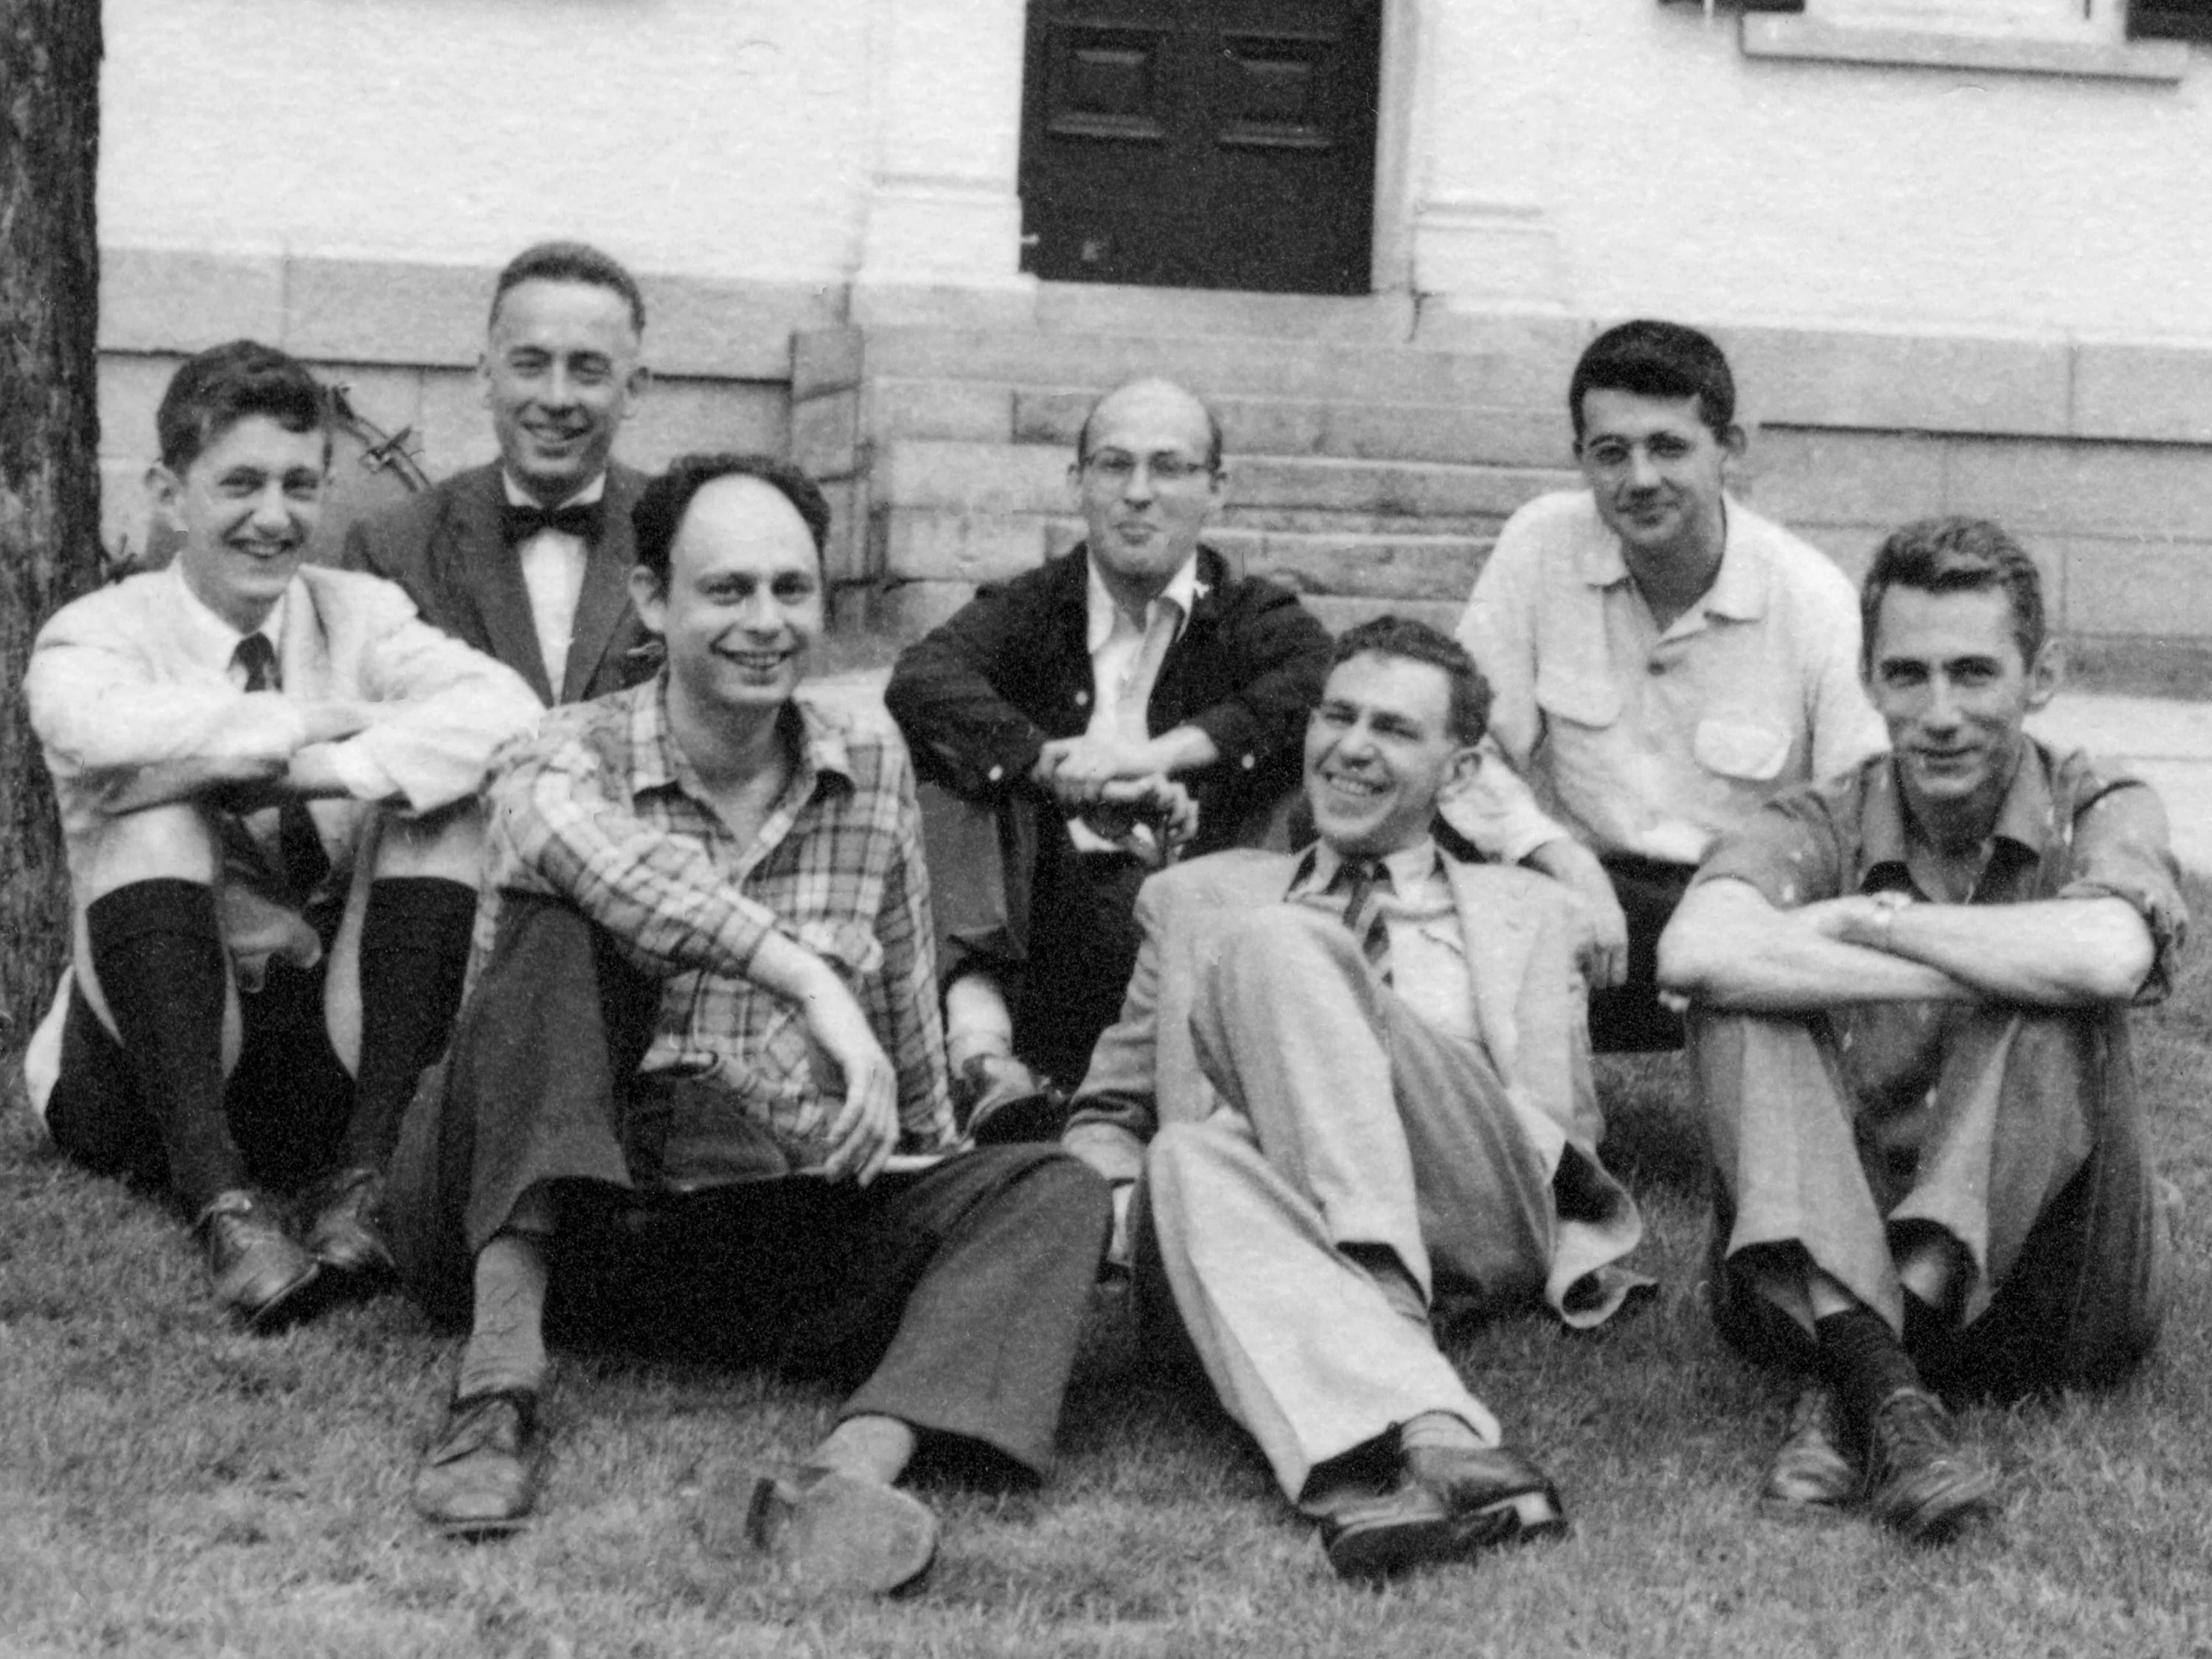

Before delving into AI in the stock market, we need to discuss statistics and mathematics in the stock market.

### History of Statistics in the Stock Market
The use of statistics in the stock market has evolved significantly over the years. Before the 1960s, there was no comprehensive database available for statistical analysis of stock price movements. This changed with the introduction of the Center for Research in Security Prices (CRSP) database in the 1960s, which allowed for more detailed statistical analysis of stock returns.

which allowed the ease of use of many technique like Linear Regression. Analyist usually use more than one technique to improve thier accuracy but for the sake of simplification we will go with linear regression only.

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. In the context of trading and investing, linear regression serves as a technical indicator to predict future prices based on historical data.

I made a small code to visuallize the technique

In [ ]:
!pip install pandas numpy scikit-learn matplotlib

[*********************100%***********************]  1 of 1 completed


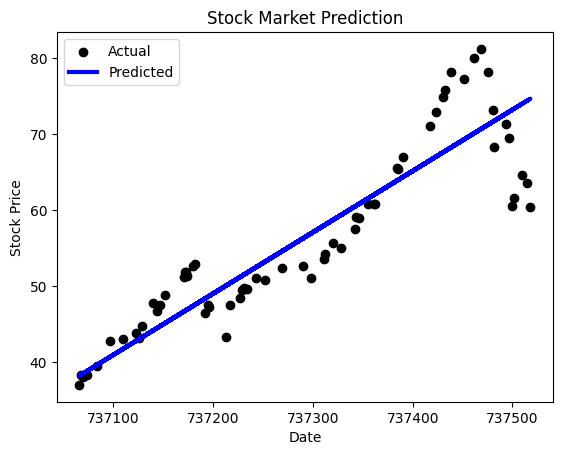

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = 'AAPL'  # You can change this to any stock ticker
data = yf.download(ticker, start='2019-01-01', end='2020-04-10')

# Create DataFrame
df = pd.DataFrame(data)

# Reset index to get 'Date' as a column
df.reset_index(inplace=True)

# Convert Date to numerical value
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

# Use 'Close' prices for prediction
X = df[['Date']]
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()


### Continuing with the history
#### Black-Scholes Model
In 1973, Fischer Black and Myron Scholes developed an equation that changed the industry. It was the first time the entire industry agreed to use an academic method to price something.

The Black-Scholes equation requires six variables: volatility, the price of the underlying asset, the strike price of the option, the time until the expiration of the option, the risk-free interest rate, and the type of option, whether it’s a call or put. With these variables, it is theoretically possible for options sellers to set rational prices for the options they are selling.

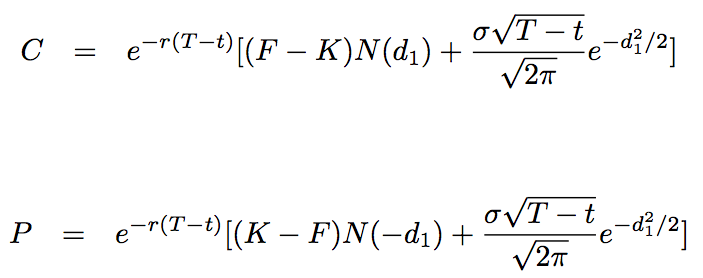

In [6]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.

    Parameters:
    S : float : Current stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate
    sigma : float : Volatility of the stock

    Returns:
    float : Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05 # Risk-free interest rate (5%)
sigma = 0.2 # Volatility (20%)

call_price = black_scholes_call(S, K, T, r, sigma)
print(f"The Black-Scholes price for the call option is: {call_price:.2f}")


The Black-Scholes price for the call option is: 10.45


# Expert Systems
An expert system is a type of artificial intelligence (AI) designed to emulate the decision-making abilities of a human expert. These systems are built to solve complex problems by reasoning through bodies of knowledge, primarily represented as if-then rules rather than conventional procedural code.

### Key Components of Expert Systems
1.	Knowledge Base: Contains the domain-specific knowledge, including facts and rules.
2.	Inference Engine: Applies logical rules to the knowledge base to deduce new information or make decisions.
3.	User Interface: Allows users to interact with the system, input data, and receive advice or decisions.
4.	Explanation Module: Provides explanations about the reasoning process and conclusions reached by the system


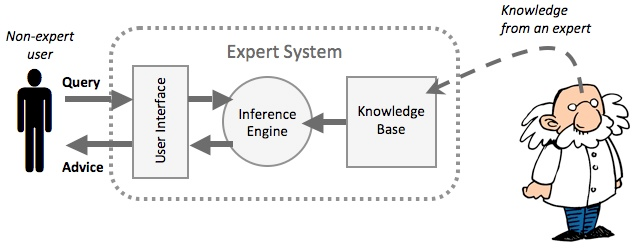

### Expert Systems in stock market
The first use of expert systems in the stock market was made by two students, K.C. Chen and Ting-Peng Lian. They created a program called Protrader. Protrader, short for PROgram TRADER, is an expert system prototype specifically designed for program trading. Program trading involves using computer algorithms to execute large orders in the stock and futures markets, often to take advantage of price discrepancies. This program predicted the 1986 87-point drop in the Dow Jones Industrial Average.


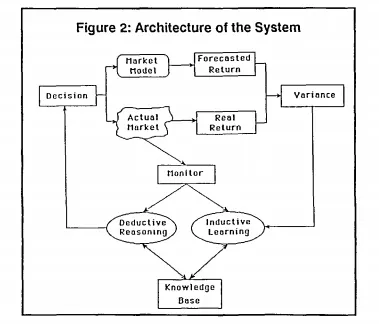

here is a small example of an expert system made in python:

[*********************100%***********************]  1 of 1 completed
<ipython-input-7-90099d68b2fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, 0)


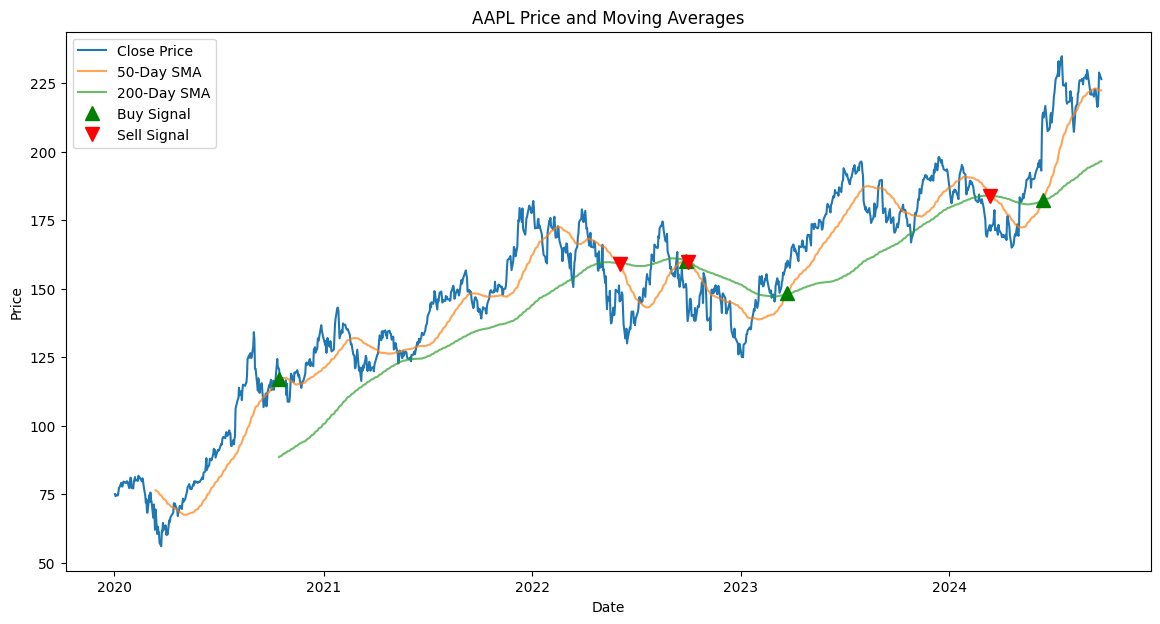

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-09-24')

# Calculate moving averages
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Define buy/sell signals
data['Signal'] = 0
data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, 0)
data['Position'] = data['Signal'].diff()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', alpha=0.7)
plt.plot(data['SMA200'], label='200-Day SMA', alpha=0.7)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index,
         data['SMA50'][data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index,
         data['SMA50'][data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{ticker} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Machine learning
Machine learning (ML) is a branch of artificial intelligence (AI) that focuses on developing algorithms that allow computers to learn from and make decisions based on data. Instead of being explicitly programmed to perform a task, machine learning models are trained on large datasets to identify patterns and make predictions or decisions without human intervention.

# Machine learning in Stock Market
The first significant use of machine learning in the stock market dates back to the late 1980s and early 1990s. During this period, researchers and financial institutions began exploring the potential of machine learning algorithms to predict stock prices and optimize trading strategies. there are no clear inforamtion of how exactly hedge funds use Machine learning techniques since thier algorithems are considered secrets.

### Jim Simons’ Medallion Fund
Jim Simons’ Medallion Fund is renowned for being one of the most successful hedge funds in history. they used to hire sceintest and statistics experts more than financial experts which gave them an advantage in the fast groing tech world.



*   Average Annual Returns: The Medallion Fund achieved an average gross annual return of 66% over three decades. Even after accounting for significant fees (5% fixed fee and 44% performance fee after 2002), the fund averaged around 39% in annual returns.
*   Comparison with S&P 500: Between 1988 and 2018, 100 dollar invested in the Medallion Fund would have grown to over 2.1 million dollar, compared to just $914 if invested in the S&P 500. This stark difference underscores the fund’s exceptional performance.

*   Outperformance: The Medallion Fund has consistently outperformed not only the S&P 500 but also other prominent investors like Warren Buffett and Peter Lynch.
*   Secretive Strategies: The success of the Medallion Fund is largely attributed to its use of advanced mathematical models, massive datasets, and artificial intelligence to detect price patterns. The strategies employed are highly secretive and involve a significant amount of leverage.

Jim Simons’ approach has set a high bar in the hedge fund industry, making the Medallion Fund one of the most successful and closely watched funds in history

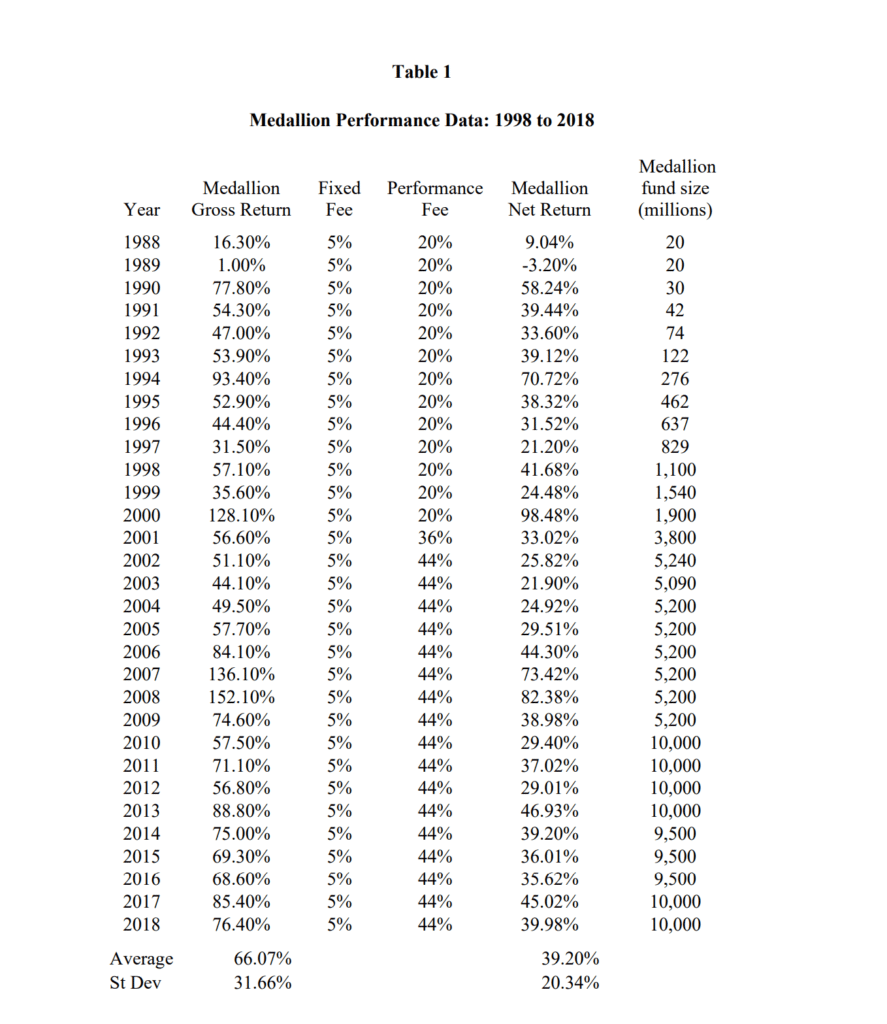

Example of ML in Stock Market

# Large Language Model
Large Language Model (LLM) is a type of deep learning algorithm designed to understand, generate, and predict text by leveraging vast amounts of data and parameters. These models are a subset of artificial intelligence (AI) and are particularly powerful in natural language processing (NLP) tasks, such as translation, summarization, and text generation.

### Large Language Model in Stock Market
Large Language Models (LLMs) like GPT-4 are revolutionizing the stock market by enhancing the accuracy and efficiency of financial forecasting and analysis. These models, trained on vast datasets, can process and interpret complex financial data, including market news, investor sentiment, and historical stock prices, to generate insightful predictions and strategies. For instance, LLMs can outperform human analysts in forecasting market trends, as they can quickly analyze and synthesize information from diverse sources. This capability not only aids in making more informed investment decisions but also increases the speed and precision of trading operations. As a result, LLMs are becoming indispensable tools for investors and financial institutions aiming to stay ahead in the competitive stock market landscape

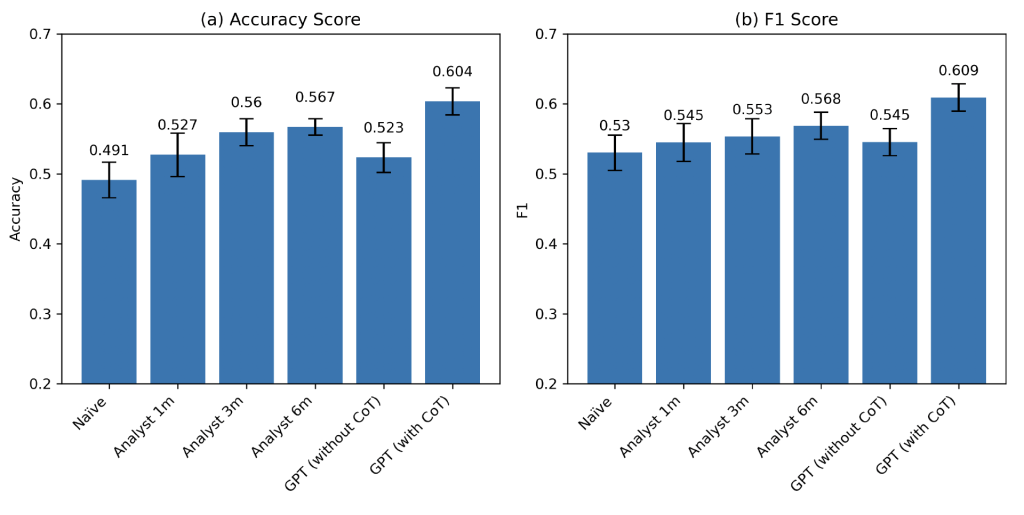
